# Problem set 4: Analyzing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import pandas as pd
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

# Tasks

## Import national account data from Denmark Statistics

Consider the following dictionary definitions:

In [2]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [8]:
# hint, nah1_api = DstApi('?') 
nah1_api = DstApi('NAH1')

# hint, params = nah1_api._define_base_params(language='en')
params = nah1_api._define_base_params(language='en')

# nah1 = nah1_api.get_data(?)
nah1 = nah1_api.get_data(params=params)

**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [78]:
nah1_true = nah1.copy()

# hint, nah1_true.rename(?,inplace=True)
nah1_true.rename(columns=columns_dict,inplace=True)

# for key,value in var_dict.items():
#   nah1.variable.replace(?)
for key,value in var_dict.items():
    nah1_true.variable.replace(key,value,inplace=True)

#for key,value in unit_dict.items():
#   nah1.unit.replace(?)
for key,value in unit_dict.items():
    nah1_true.unit.replace(key,value,inplace=True)

**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [79]:
## To do this, we 1) initiate a boolean array of False values, and 2) we iterate over the values of the dictionary and update the boolean array with the logical OR operator "|
I = False
for value in var_dict.values():
    I = I | (nah1_true.variable == value) ## I is updated to true if the variable is in the dictionary

nah1_true = nah1_true.loc[I] ## Finally, keep only the rows where I is True

nah1_true.value = nah1_true.value.astype('float')

**Step 4:** Discuss what the following summary statistics show.

In [80]:
nah1_true.groupby(['variable','unit']).describe()

year                                                       \
                 count    mean        std     min      25%     50%      75%   
variable unit                                                                 
C        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
G        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
I        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
M        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
X        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
Y        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2023.0  58.0  8.245040e+05  5.470365e+05    62576.0   
         real     2023.0  58.0  1.076335e+06  2.899323e+05   549491.0   
G        nominal  2023.0  58.0  2.792485e+05  1.923473e+05    14768.0   
         real     2023.0  58.0  3.763944e+05  1.050996e+05   171307.0   
I        nominal  2023.0  58.0  2.443793e+05  1.745084e+05    21134.0   
         real     2023.0  58.0  2.867239e+05  1.180796e+05   127630.0   
M        nominal  2023.0  58.0  4.892097e+05  4.315943e+05    24406.0   
         real     2023.0  58.0  5.193109e+05  3.540163e+05   112171.0   
X        nominal  2023.0  58.0  5.528596e+05  4.986340e+05    23110.0   
         real     2023.0  58.0  6.026687e+05  3.985825e+05   123594.0   
Y        nominal  2023.0  58.0  1.947509e+06  1.408479e+06   144582.0   
         real     2023.0  58.0  2.398232e+06  8.734029e+05  1089347.0   

                                                                
                         25%        50%         75%        max  
variable unit                                                   
C        nominal   331396.75   760812.5  1313458.75  1909003.0  
         real      848126.75  1049562.0  1353608.75  1569998.0  
G        nominal   109026.50   245849.5   473857.00   629928.0  
         real      312263.75   359337.5   484169.25   538248.0  
I        nominal    81899.50   200249.0   364978.50   676212.0  
         real      183260.00   251935.0   363662.25   567588.0  
M        nominal   137277.00   319217.5   830904.25  1668327.0  
         real      214768.00   375838.5   836879.75  1361759.0  
X        nominal   137473.50   373041.0   910000.25  1982502.0  
         real      250584.00   481929.0   935698.25  1600741.0  
Y        nominal   696373.00  1644185.0  3113699.50  5254759.0  
         real     1616288.50  2247981.5  3208718.00  4128962.0

**Step 5:** Sort the dataset by year

In [81]:
nah1_true.sort_values(by='year',inplace=True)
nah1_true.head()

,variable,unit,year,value
3351,M,nominal,1966,24406.0
3344,X,real,1966,123594.0
3335,I,nominal,1966,21134.0
3334,I,real,1966,127630.0
3325,G,nominal,1966,14768.0


**Answer:** See A1.py

## Merge with population data from Denmark Statistics

Load population data from Denmark Statistics:

In [55]:
FT_api = DstApi('FT')
params = FT_api._define_base_params(language='en')
params['variables'][0]['values'] = ['000'] 
## 000 is the code for all of Denmark, this can be seen by using: FT_api.variable_levels('HOVEDDELE', language='en')
pop = FT_api.get_data(params=params)

pop.rename(columns={'TID':'year','INDHOLD':'population'},inplace=True)
pop =  pop.loc[:,['year','population']]
pop.head()

,year,population
0,2010,5534738
1,1769,797584
2,1840,1289075
3,1860,1608362
4,1901,2449540


**Question 1:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [82]:
merged_true = pd.merge(pop,nah1_true,how='inner',on=['year'])
merged_true.tail(10)

,year,population,variable,unit,value
638,1970,4937579,M,real,157151.0
639,1970,4937579,X,nominal,34771.0
640,1970,4937579,X,real,154880.0
641,1970,4937579,Y,nominal,213743.0
642,1970,4937579,I,real,168129.0
643,1970,4937579,G,nominal,26845.0
644,1970,4937579,G,real,222350.0
645,1970,4937579,C,nominal,97441.0
646,1970,4937579,Y,real,1282852.0
647,1970,4937579,I,nominal,34253.0


**Answer:** See A2.py

**Question 2:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [83]:
pop_with_index = pop.set_index('year')
pop_with_index.rename(columns={'population':'population_alt'},inplace=True)
merged_with_index = merged_true.set_index('year')
merged_alt = merged_with_index.join(pop_with_index)
merged_alt.tail(10)

,population,variable,unit,value,population_alt
year,,,,,
2023,5932654,X,nominal,1922593.0,5932654
2023,5932654,M,real,1361759.0,5932654
2023,5932654,M,nominal,1651328.0,5932654
2023,5932654,G,nominal,629928.0,5932654
2023,5932654,C,nominal,1909003.0,5932654
2023,5932654,C,real,1553609.0,5932654
2023,5932654,Y,nominal,5191284.0,5932654
2023,5932654,Y,real,4128962.0,5932654
2023,5932654,I,real,496237.0,5932654


**Answer:** See A3.py

## Split-apply-combine-(plot)

Consider the following **split-apply-combine-plot:**

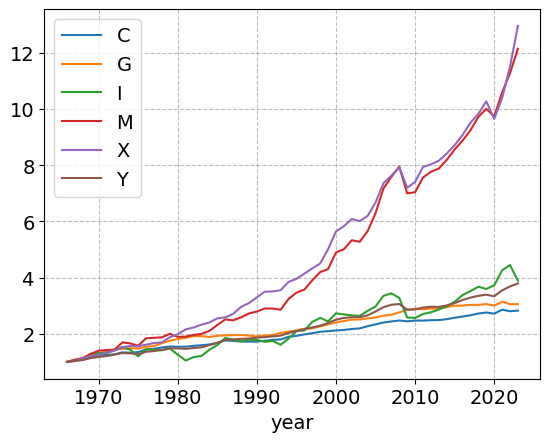

In [84]:
# a. split
nah1_true_grouped = nah1_true.groupby(['variable','unit'])
nah1_true_grouped_first = nah1_true_grouped.value.first()
nah1_true_grouped_first.name = 'first'

# b. apply
nah1_true.set_index(['variable','unit','year'],inplace=True)
nah1_true = nah1_true.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
nah1_true.reset_index(inplace=True)

# c. combine
nah1_true['indexed'] = nah1_true['value']/nah1_true['first']

# d. plot
def plot(df,variable='indexed'):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])[variable].plot(legend=True);
    
plot(nah1_true)

**Question** Implement the same split-apply-combine as above using `transform`.

In [91]:
def first(x): # select the first element in a series
    return x.iloc[0]

nah1_alt = nah1_true.copy()
grouped = nah1_alt.groupby(['variable', 'unit'])
nah1_alt['index_transform'] = grouped.value.transform(lambda x: x/first(x))  ## here we define a lambda function to be evaluated on grouped.value
nah1_alt.head()

,variable,unit,year,value,first,indexed,index_transform
0,M,nominal,1966,24406.0,24406.0,1.0,1.0
1,X,real,1966,123594.0,123594.0,1.0,1.0
2,I,nominal,1966,21134.0,21134.0,1.0,1.0
3,I,real,1966,127630.0,127630.0,1.0,1.0
4,G,nominal,1966,14768.0,14768.0,1.0,1.0


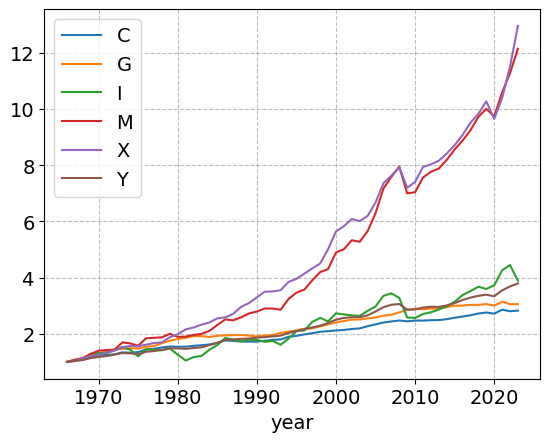

In [92]:
plot(nah1_alt,variable='index_transform')

**Answer:** See A4.py

# Problem: The Housing market


## Housing data

**Note:** The file `data/bm010_parcel.xlsx` has been downloaded from http://rkr.statistikbank.dk/201.

**Question:** Go through the cell below and ensure you understand ALL commands.

In [93]:
# a. load data
prices = pd.read_excel('data/bm010_parcel.xlsx', skiprows=2)
prices.rename(columns={'Unnamed: 2': 'municipality'}, inplace=True)

# b. delete columns
del prices['Unnamed: 0']
del prices['Unnamed: 1']

# c. rename time columns: 1992K1 -> price19921
time_dict = {} 
for y in range(1992,2021+1): 
    for k in range(1,4+1): 
        str_from = f'{y}K{k}'
        str_to   = f'price{y}{k}'
        time_dict[str_from] = str_to
prices = prices.rename(columns = time_dict)        

# d. drop missing
prices = prices.dropna()

# e. convert to long
prices_long = pd.wide_to_long(prices, stubnames='price', i='municipality', j='year_quarter')
prices_long.reset_index(inplace=True)

# f. drop missing and convert to float
I = prices_long.loc[prices_long.price == '..']
prices_long.drop(I.index, inplace=True)
prices_long.price = prices_long.price.astype('float')

# g. create date variable
prices_long['d'] = (prices_long.year_quarter.astype(str).str[:4] # grab the year, first four digits
          + 'Q' # add the letter Q 
          + prices_long.year_quarter.astype(str).str[4]) # the quarter (fifth digit)
prices_long['date'] = pd.PeriodIndex(prices_long.d,freq='Q').to_timestamp() # Convert to datetime
# prices_long['date'] = pd.to_datetime(prices_long.d) This works just as well but throws a warning


# h. cleanup 
del prices_long['year_quarter']
del prices_long['d']

prices_long.head()

,municipality,price,date
0,Hele landet,4021.0,1992-01-01
1,Region Hovedstaden,5836.0,1992-01-01
2,Landsdel København by,5658.0,1992-01-01
3,København,5355.0,1992-01-01
4,Frederiksberg,5183.0,1992-01-01


## Population data

**Question:** Go through the cell below and ensure you understand ALL commands.

In [95]:
# a. Initiate dstapi 
folk1a_api = DstApi('FOLK1A')

# b. Define which data to load
params = folk1a_api._define_base_params(language='en')
params['variables'][1]['values'] = ['TOT']
params['variables'][2]['values'] = ['IALT']
params['variables'][3]['values'] = ['TOT']

# c. Load data
pop = folk1a_api.get_data(params=params)


# d. drop and rename columns
for v in ['ALDER', 'CIVILSTAND', 'KØN']: 
    del pop[v]
pop = pop.rename(columns = {'INDHOLD':'population', 'OMRÅDE': 'municipality'})

# e. drop non-municipalities
for val in ['Region', 'All']: 
    I = pop['municipality'].str.contains(val)
    pop.drop(pop[I].index, inplace=True)

# f. convert to date
pop['date'] = pd.PeriodIndex(pop.TID,freq='Q').to_timestamp() # Convert to datetime
del pop['TID']

pop.head()

,municipality,population,date
0,Brøndby,33998,2010-10-01
3,Brøndby,35197,2015-07-01
4,Hvidovre,50028,2010-10-01
5,Varde,50309,2015-07-01
6,Fredensborg,39254,2009-01-01


## Analysis

**Problem:** Analyze the co-variation betwen population growth and house price growth. Reproduce the graphs below. 

**Hint:** For the second one consider the `agg` method (similar to but different from `transform`, Google it).

In [97]:
prices_long_backup = prices_long.copy()
pop_backup = pop.copy()

In [158]:
## merge datasets together
df = pd.merge(left=prices_long, right=pop, on=['municipality', 'date'], how='right')
df.sort_values(by=['municipality', 'date'], inplace=True)

## log population and log prices
df['log_population'] = np.log(df.population)
df['log_price'] = np.log(df.price)


## split-apply-combine to compute first differences (first plot)
## 1. split
df_grouped = df.groupby(['municipality'])

## 2. apply-combine (one step using transform)
df['log_dif_price'] = df_grouped.log_price.transform('diff') ## 'diff' is built-in function in pandas
df['log_dif_pop'] = df_grouped.log_population.transform('diff')

## split-apply-combine to compute within-municipality mean log difference
## 1. split
def mean_dif(x):
    return np.mean(x.diff())

df_mean = df.groupby('municipality').agg({'log_population':[mean_dif,'last'],'log_price':mean_dif})
df_mean.columns = ['mean_dif_log_pop', 'last_log_pop', 'mean_dif_log_price']

# ## 3. combine
df = pd.merge(left=df, right=df_mean, on='municipality')

**Answer:** See A5.py for difference in population within municipality. See A6.py for average difference within municipality

Text(0, 0.5, 'log difference in price')

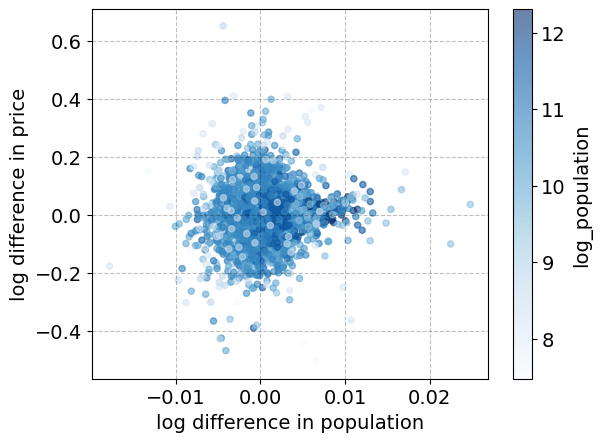

In [150]:
## Making plot 1
ax = df.plot(x='log_dif_pop', y='log_dif_price', kind='scatter', c='log_population', cmap='Blues', alpha=0.6)
ax.set_xlabel('log difference in population')
ax.set_ylabel('log difference in price')

Text(0, 0.5, 'within municipality mean log difference in prices')

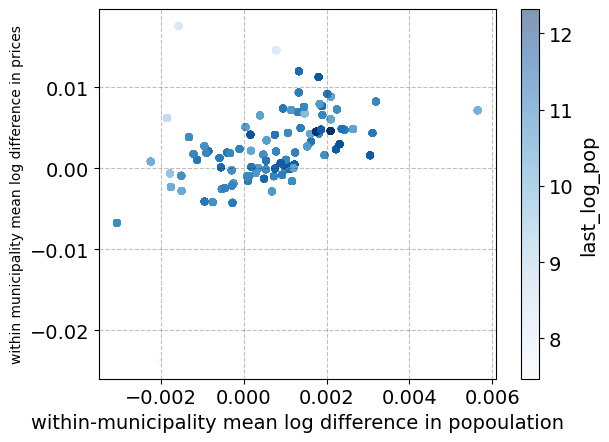

In [165]:
## Making plot 2
ax = df.plot(x='mean_dif_log_pop', y='mean_dif_log_price', kind='scatter', c='last_log_pop', cmap='Blues', alpha=0.5)
ax.set_xlabel('within-municipality mean log difference in popoulation')
ax.set_ylabel('within municipality mean log difference in prices', fontsize=10)